In [7]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('axes',unicode_minus=False)

In [8]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
dataset.head()

,hour,pass
0,0.5,0
1,1.2,0
2,1.8,0
3,2.4,0
4,2.6,0


In [9]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values
X.shape, y.shape

((20, 1), (20,))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
logistic.predict([[4.5]])

array([1])

In [13]:
import numpy as np
for hour in np.arange(4.0, 5.0, 0.1):
    pred = logistic.predict([[hour]])
    print(f'{hour:.1f}:{pred[0]}')

4.0:0
4.1:0
4.2:0
4.3:0
4.4:0
4.5:1
4.6:1
4.7:1
4.8:1
4.9:1


In [14]:
df=pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [15]:
X=df[['hour']].values
X

KeyError: "None of [Index(['hour'], dtype='object')] are in the [columns]"

In [ ]:
y_pred = logistic.predict(X)
y_pred

array([0, 1, 1, 1])

In [ ]:
df['pass'] = y_pred
df['합격여부']=df['pass'].apply(lambda x:'합격' if x==1 else'불합격')
df

,name,hour,pass,합격여부
0,홍길동,4.2,0,불합격
1,강감찬,5.1,1,합격
2,이순신,4.5,1,합격
3,성춘향,7.2,1,합격


In [ ]:
logistic.score(X_train, y_train)

0.875

In [ ]:
import numpy as np
# max = np.ceil(np.max(X_train)) #올림
# min = np.floor(np.min(X_train)) #버림
# x_range = np.arange(min, max, 0.1)
x_range = np.arange(0,10.1,0.1)
x_range

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
#공식 대입하여 p값 구하기/ p = 1/(1+e^-y)  y=mx+b  
y = logistic.coef_*x_range+logistic.intercept_
P = 1/(1+np.exp(-y)) #2차함배열, 1차함으로 변경필요(그래프y값화)
y_range = P.reshape(P.shape[1])
y_range.shape

(101,)

In [ ]:
max = np.ceil(np.max(X_train)) #올림
min = np.floor(np.min(X_train)) #버림

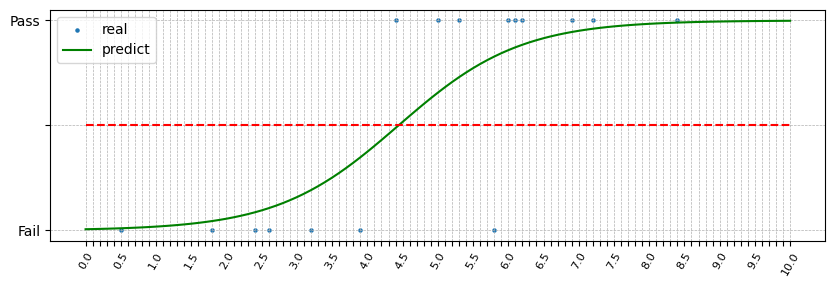

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train, label='real', s=5)
plt.plot(x_range, y_range, color='g', label='predict')
plt.plot(x_range, np.full(len(x_range),0.5), color='red', ls='--')
# plt.ylim(0,1)
plt.grid(True, ls='--',lw=0.5)
yticks =[y for y in np.arange(0.0,1.1,0.5)]
plt.yticks([0,0.5,1],['Fail','','Pass'])
xticks = [x for x in np.arange(0,10.1,0.1)]
xlabel=[x if x%0.5==0 else'' for x in xticks]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
# plt.xlim(0,10)
plt.legend()
plt.show()

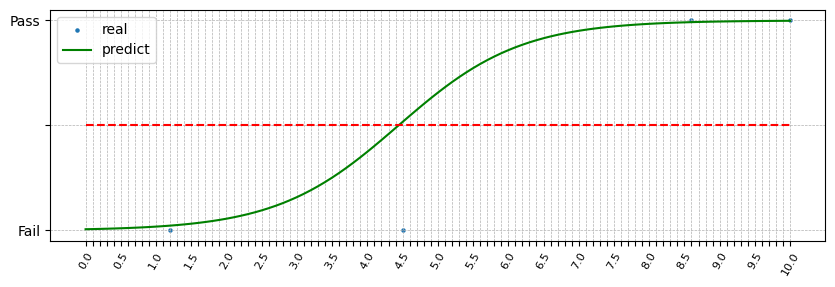

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(X_test, y_test, label='real', s=5)
plt.plot(x_range, y_range, color='g', label='predict')
plt.plot(x_range, np.full(len(x_range),0.5), color='red', ls='--')
# plt.ylim(0,1)
plt.grid(True, ls='--',lw=0.5)
yticks =[y for y in np.arange(0.0,1.1,0.5)]
plt.yticks([0,0.5,1],['Fail','','Pass'])
xticks = [x for x in np.arange(0,10.1,0.1)]
xlabel=[x if x%0.5==0 else'' for x in xticks]
plt.xticks(xticks, labels=xlabel, rotation=60, size=8)
# plt.xlim(0,10)
plt.legend()
plt.show()

In [ ]:
#혼동행렬-로지스틱스에서 몇개 맞춘지 확인가능
y_pred = logistic.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1]), array([1, 0, 1, 0]))

In [ ]:
y_pred = logistic.predict(X_train)
y_pred, y_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1]),
 array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]))

In [ ]:
y_pred = logistic.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#맞은 답 확인
true = cm[0][0] + cm[1][1]
false = cm[0][1]+cm[1][0]
true, false
print(f'정답수:{true}, 오답수:{false}')

정답수:3, 오답수:1


In [ ]:
y_pred = logistic.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm
#맞은 답 확인
true = cm[0][0] + cm[1][1]
false = cm[0][1]+cm[1][0]
true, false
print(f'정답수:{true}, 오답수:{false}')

정답수:14, 오답수:2


In [ ]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

y_pred = logistic.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
cm = confusion_matrix(y, y_pred)
cm

array([[ 7,  2],
       [ 1, 10]])

In [ ]:
true=cm[0][0]+cm[1][1]
print(f'정답수:{true}')

정답수:17


In [ ]:
logistic.score(X,y), 17/20

(0.85, 0.85)

In [ ]:
df = dataset.copy()
df['predict']=y_pred
filt = df['pass'] !=df['predict']
df[filt]

,hour,pass,predict
7,4.4,1,0
8,4.5,0,1
11,5.8,0,1


In [ ]:
import pandas as pd
df = pd.read_csv('data/로지스틱회귀.csv')
df

,이름,공부시간
0,홍길동,4.2
1,강감찬,5.1
2,이순신,4.5
3,성춘향,7.2
4,이몽룡,2.8


In [26]:
X=df.loc[:,'공부시간'].values
X2 = X.reshape(len(X), 1)
y_pred = logistic.predict(X2)
y_pred_proba = logistic.predict_proba(X2)
df['pass'] = y_pred
y_pred_pass = [f'{y[1]*100:.2f}%' for y in y_pred_proba]
df['예상합격률'] = y_pred_pass
df['합격예측값']=df['pass'].apply(lambda x:'합격' if x==1 else'불합격')
df.drop(columns='pass',inplace=True)
df

,이름,공부시간,합격예측값,예상합격률
0,홍길동,4.2,불합격,43.06%
1,강감찬,5.1,합격,68.18%
2,이순신,4.5,합격,51.69%
3,성춘향,7.2,합격,96.05%
4,이몽룡,2.8,불합격,13.02%
